In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('df6.xlsx')

In [7]:
df

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),...,sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result,Omega score,Sex
0,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.450,5598.50,3621.04,5.090,19.08,16.452,...,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,0.938342,Positive,2.962820,Male
1,CRC 456,CRC 456 PLS 1,Colorectum,I,715.308,20936.35,2772.96,7.270,10.04,40.910,...,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,0.925363,Positive,2.445405,Female
2,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.530,2350.93,4120.77,4.854,16.96,16.452,...,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,0.852367,Negative,1.215758,Female
3,CRC 458,CRC 458 PLS 1,Colorectum,II,715.308,1604.34,2029.96,5.390,8.31,16.452,...,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,0.617639,Negative,1.640793,Female
4,CRC 459,CRC 459 PLS 1,Colorectum,II,801.300,2087.57,2069.17,4.854,11.73,16.452,...,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,0.318434,Negative,1.325771,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,PAPA 1353,PAPA 1353 PLS 1,Ovary,I,879.498,1484.70,2096.76,24.820,10.30,42.390,...,5390.31,8538.58,16.890,599.40,167799.61,50128.60,0.980312,Positive,0.983813,Female
1813,PAPA 1354,PAPA 1354 PLS 1,Ovary,I,1337.330,1607.90,852.37,5.580,9.80,16.440,...,7951.03,12966.19,16.890,599.40,123443.76,54066.98,0.999995,Positive,3.915387,Female
1814,PAPA 1355,PAPA 1355 PLS 1,Ovary,III,879.498,1592.84,1044.45,30.480,8.48,16.440,...,2396.36,1901.41,16.890,599.40,104070.89,39844.02,1.000000,Positive,7.962561,Female
1815,PAPA 1356,PAPA 1356 PLS 1,Ovary,II,879.498,5267.95,1445.69,1469.450,23.74,62.260,...,3079.81,5312.90,16.890,6864.33,110579.24,42921.13,1.000000,Positive,0.807685,Female


In [9]:
df = df.drop([ 'Sample ID #', 'Patient ID #', 'CancerSEEK Logistic Regression Score', 'CancerSEEK Test Result', 'Sex'], axis=1)

In [12]:
df = df.drop("AJCC Stage", axis=1)

In [13]:
df

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Omega score
0,Colorectum,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.07,1938.654,...,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,2.962820
1,Colorectum,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.43,1938.654,...,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,2.445405
2,Colorectum,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.75,1976.940,...,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,1.215758
3,Colorectum,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.53,1938.654,...,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,1.640793
4,Colorectum,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.49,1938.654,...,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,1.325771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,Ovary,879.498,1484.70,2096.76,24.820,10.30,42.390,14.92,914.00,1970.916,...,2542.26,207.240,115.24,5390.31,8538.58,16.890,599.40,167799.61,50128.60,0.983813
1813,Ovary,1337.330,1607.90,852.37,5.580,9.80,16.440,12.32,1179.51,1970.916,...,1670.22,207.240,147.17,7951.03,12966.19,16.890,599.40,123443.76,54066.98,3.915387
1814,Ovary,879.498,1592.84,1044.45,30.480,8.48,16.440,8.26,443.01,3589.730,...,1194.03,207.240,104.63,2396.36,1901.41,16.890,599.40,104070.89,39844.02,7.962561
1815,Ovary,879.498,5267.95,1445.69,1469.450,23.74,62.260,16.53,443.01,50659.050,...,1607.16,207.240,73.55,3079.81,5312.90,16.890,6864.33,110579.24,42921.13,0.807685


In [14]:
df['Tumor type'].value_counts()



Tumor type
Normal        812
Colorectum    388
Breast        209
Lung          104
Pancreas       93
Stomach        68
Ovary          54
Esophagus      45
Liver          44
Name: count, dtype: int64

In [15]:
def map_tumor_type(value):
    if value == 'Normal':
        return 0
    else:
        return 1

df['Tumor type'] = df['Tumor type'].map(map_tumor_type).astype(int)


In [16]:
df['Tumor type'].value_counts()

Tumor type
1    1005
0     812
Name: count, dtype: int64

In [17]:
X = df.drop('Tumor type', axis=1)
y = df['Tumor type']

In [21]:
import xgboost
classifier=xgboost.XGBClassifier()

In [12]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    }

In [13]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
y.value_counts()

Tumor type
1    1005
0     812
Name: count, dtype: int64

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Inicializar el XGBClassifier con los hiperparámetros especificados
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.05,
    random_state=42
)

# Entrenar el modelo
model = xgb_model.fit(X_train, y_train)

# Evaluación en el conjunto de entrenamiento
y_train_pred = xgb_model.predict(X_train)
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))

# Evaluación en el conjunto de prueba
y_test_pred = xgb_model.predict(X_test)
print("Test Set Metrics:")
print(classification_report(y_test, y_test_pred))


Training Set Metrics:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       536
           1       0.98      0.99      0.98       681

    accuracy                           0.98      1217
   macro avg       0.98      0.98      0.98      1217
weighted avg       0.98      0.98      0.98      1217

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       276
           1       0.96      0.97      0.96       324

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [39]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Inicializar el LGBMClassifier con los hiperparámetros especificados
lgbm_model = LGBMClassifier(
    n_estimators=70,
    max_depth=3,
    learning_rate=0.07,
    random_state=42
)

# Entrenar el modelo
model = lgbm_model.fit(X_train, y_train)

# Evaluación en el conjunto de entrenamiento
y_train_pred = lgbm_model.predict(X_train)
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))

# Evaluación en el conjunto de prueba
y_test_pred = lgbm_model.predict(X_test)
print("Test Set Metrics:")
print(classification_report(y_test, y_test_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 681, number of negative: 536
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000954 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9486
[LightGBM] [Info] Number of data points in the train set: 1217, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.559573 -> initscore=0.239428
[LightGBM] [Info] Start training from score 0.239428
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 681, number of negative: 536
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9486
[LightGBM] [Info] Number of data points in the train set: 1217, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.559573 -> initscore=0.239428
[LightGBM] [Info] Start training from score 0.239428
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

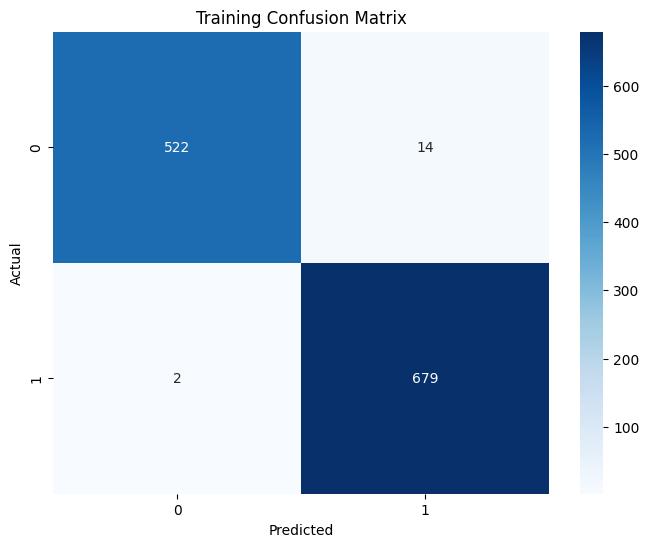

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       276
           1       0.97      0.97      0.97       324

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



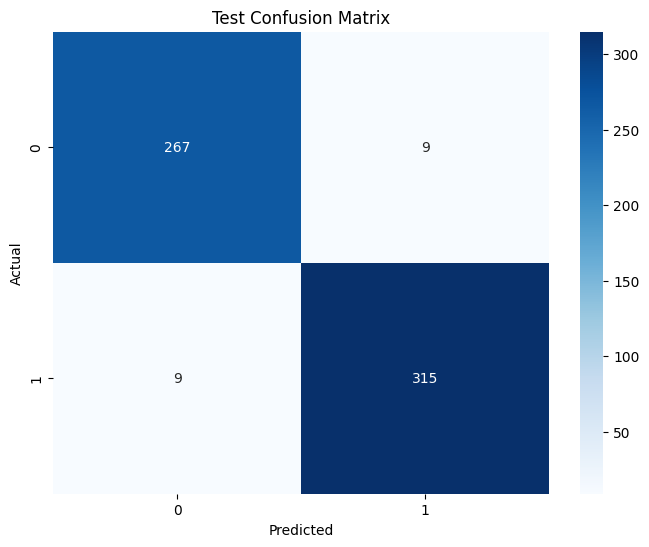

In [61]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

xgb_model = XGBClassifier(
    n_estimators=110,
    max_depth=3,
    learning_rate=0.05,
    random_state=42
)

lgbm_model = LGBMClassifier(
    n_estimators=110,
    max_depth=3,
    learning_rate=0.05,
    random_state=42
)

voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model)
    ],
    voting='soft'  # Utilizamos 'soft' para predecir basado en las probabilidades
)

voting_clf.fit(X_train, y_train)

# Evaluación en el conjunto de entrenamiento
y_train_pred = voting_clf.predict(X_train)
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluación en el conjunto de prueba
y_test_pred = voting_clf.predict(X_test)
print("Test Set Metrics:")
print(classification_report(y_test, y_test_pred))
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [62]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Inicializar los modelos con hiperparámetros especificados
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.05,
    random_state=42
)

lgbm_model = LGBMClassifier(
    n_estimators=70,
    max_depth=3,
    learning_rate=0.07,
    random_state=42
)

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.05,
    random_state=42
)

# Definir el VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('gb', gb_model)
    ],
    voting='soft'  # Utilizamos 'soft' para predecir basado en las probabilidades
)

# Entrenar el VotingClassifier
voting_clf.fit(X_train, y_train)

# Evaluación en el conjunto de entrenamiento
y_train_pred = voting_clf.predict(X_train)
print("Training Set Metrics:")
print(classification_report(y_train, y_train_pred))
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluación en el conjunto de prueba
y_test_pred = voting_clf.predict(X_test)
print("Test Set Metrics:")
print(classification_report(y_test, y_test_pred))
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 681, number of negative: 536
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9486
[LightGBM] [Info] Number of data points in the train set: 1217, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.559573 -> initscore=0.239428
[LightGBM] [Info] Start training from score 0.239428
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [54]:
random_cv.best_estimator_


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
classifier=xgboost.XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None)

In [56]:
classifier.fit(X_train,y_train)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))

print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



print('----------------------------------')

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


print('='*35)
print('\n')

Model performance for Training set
- Accuracy: 0.9827
- F1 score: 0.9827
- Precision: 0.9755
- Recall: 0.9941
- Roc Auc Score: 0.9812
----------------------------------
Model performance for Test set
- Accuracy: 0.9600
- F1 score: 0.9600
- Precision: 0.9601
- Recall: 0.9660
- Roc Auc Score: 0.9595




Bien!

### TIPO CANCER

In [17]:
df = pd.read_csv('Full_dataset.csv')

In [18]:
df = df.drop('Unnamed: 0', axis=1)

In [19]:
mapping = {
    'Colorectum': 0,
    'Lung': 1,
    'Breast': 2,
    'Pancreas': 3,
    'Ovary': 4,
    'Esophagus': 5,
    'Liver': 6,
    'Stomach': 7,
    'Normal': 8
}

# Aplicar el mapeo a la columna 'classification'
df['Tumor type'] = df['Tumor type'].map(mapping)

# Verificar los cambios
df

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Omega score
0,0,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.07,1938.654,...,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,2.962820
1,0,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.43,1938.654,...,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,2.445405
2,0,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.75,1976.940,...,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,1.215758
3,0,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.53,1938.654,...,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,1.640793
4,0,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.49,1938.654,...,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,1.325771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,4,879.498,1484.70,2096.76,24.820,10.30,42.390,14.92,914.00,1970.916,...,2542.26,207.240,115.24,5390.31,8538.58,16.890,599.40,167799.61,50128.60,0.983813
1813,4,1337.330,1607.90,852.37,5.580,9.80,16.440,12.32,1179.51,1970.916,...,1670.22,207.240,147.17,7951.03,12966.19,16.890,599.40,123443.76,54066.98,3.915387
1814,4,879.498,1592.84,1044.45,30.480,8.48,16.440,8.26,443.01,3589.730,...,1194.03,207.240,104.63,2396.36,1901.41,16.890,599.40,104070.89,39844.02,7.962561
1815,4,879.498,5267.95,1445.69,1469.450,23.74,62.260,16.53,443.01,50659.050,...,1607.16,207.240,73.55,3079.81,5312.90,16.890,6864.33,110579.24,42921.13,0.807685


In [28]:
df['Tumor type'].value_counts()

Tumor type
8    812
0    388
2    209
1    104
3     93
7     68
4     54
5     45
6     44
Name: count, dtype: int64

In [30]:
X = df.drop('Tumor type', axis=1)
y = df['Tumor type']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
y.value_counts()

Tumor type
8    812
0    388
2    209
1    104
3     93
7     68
4     54
5     45
6     44
Name: count, dtype: int64

In [35]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
learning_rate = [0.05, 0.1, 0.15, 0.20]
gamma = [0, 0.1, 0.2, 0.3]
colsample_bytree = [0.5, 0.6, 0.7, 0.8, 0.9]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'gamma': gamma,
    'colsample_bytree': colsample_bytree
}

classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=9)  # Set parameters for multi-class classification

In [36]:
random_cv = RandomizedSearchCV(estimator=classifier,
                                param_distributions=hyperparameter_grid,
                                cv=5, n_iter=50,
                                scoring='neg_log_loss',  # Use appropriate metric for multi-class classification
                                n_jobs=-1,  # Use all available CPU cores
                                verbose=5,
                                return_train_score=True)
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=9, num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   return_train_score=True, scoring='neg_log_loss', verbose=5)

In [37]:
best_xgboost_model = random_cv.best_estimator_


In [38]:
best_xgboost_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1100, n_jobs=None, num_class=9,
              num_parallel_tree=None, ...)

In [44]:
y_train_pred = best_xgboost_model.predict(X_train)
y_test_pred = best_xgboost_model.predict(X_test)

# Evaluate model performance on train and test sets
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_f1 = f1_score(y_train, y_train_pred, average='micro')  # Use 'micro' averaging for multi-class F1
model_train_precision = precision_score(y_train, y_train_pred, average='micro')
model_train_recall = recall_score(y_train, y_train_pred, average='micro')

model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='micro')
model_test_precision = precision_score(y_test, y_test_pred, average='micro')
model_test_recall = recall_score(y_test, y_test_pred, average='micro')

# Print performance metrics
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))
print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

print('----------------------------------')

print('Model performance for Test set')
print("- Accuracy: {:.4f}".format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))


Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8283
- F1 score: 0.8283
